In [7]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

In [17]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Generate random gym data including stress levels
def generate_gym_data(num_records):
    data = []
    exercises = ['Bench Press', 'Squats', 'Deadlifts', 'Running', 'Cycling', 'Yoga']
    exercise_types = ['Strength Training', 'Cardio', 'Flexibility']
    
    for _ in range(num_records):
        username = fake.first_name() + fake.last_name()
        date = fake.date_between(start_date='-1y', end_date='today').strftime('%Y-%m-%d')
        weight = round(random.uniform(50, 100), 2)  # Random weight between 50 to 100 kg
        exercise = random.choice(exercises)
        exercise_type = random.choice(exercise_types)
        duration = random.randint(20, 90)  # Random duration between 20 to 90 minutes
        calories_burned = round(random.uniform(150, 600), 2)  # Random calories burned between 150 to 600 kcal
        days_attended = random.randint(1, 7)  # Random days attended in a week
        calories_intake = round(random.uniform(1500, 3000), 2)  # Random calorie intake between 1500 to 3000 kcal
        consistency = random.randint(70, 100)  # Random consistency percentage
        
        # Calculate stress level based on calories burned and duration
        stress_level = 1  # Default to low stress
        if calories_burned > 400 and duration > 60:
            stress_level = 3  # High stress
        elif calories_burned > 300 or duration > 45:
            stress_level = 2  # Medium stress
        
        data.append([username, date, weight, exercise, exercise_type, duration, calories_burned, days_attended, calories_intake, consistency, stress_level])
    
    return pd.DataFrame(data, columns=['Username', 'Date', 'Weight_kg', 'Exercise', 'Exercise_Type', 'Duration_min', 'Calories_Burned', 'Days_Attended', 'Calories_Intake_kcal', 'Consistency_Percentage', 'Stress_Level'])




In [18]:
# Generate 1000 records of gym data
num_records = 1000
gym_data = generate_gym_data(num_records)

# Save to CSV
gym_data.to_csv('gym_data_with_stress.csv', index=False)


In [19]:
# Load the data
data = pd.read_csv('gym_data_with_stress.csv')

In [20]:
# Display the first few rows of the data
data.head()

,Username,Date,Weight_kg,Exercise,Exercise_Type,Duration_min,Calories_Burned,Days_Attended,Calories_Intake_kcal,Consistency_Percentage,Stress_Level
0,DonnaBruce,2023-09-18,94.33,Squats,Strength Training,79,400.59,3,2251.40,71,3
1,AliciaJohnson,2024-04-04,93.18,Cycling,Cardio,88,230.51,1,2772.93,74,2
2,CristinaSmith,2024-02-29,62.66,Running,Strength Training,22,493.68,4,2859.11,91,2
3,EmilyAtkinson,2024-06-23,98.91,Running,Cardio,67,256.87,3,2569.95,82,2
4,RebeccaKelly,2024-02-13,81.10,Bench Press,Strength Training,84,200.43,6,1749.05,99,2


In [21]:
# Check for missing values
print(data.isnull().sum())



Username                  0
Date                      0
Weight_kg                 0
Exercise                  0
Exercise_Type             0
Duration_min              0
Calories_Burned           0
Days_Attended             0
Calories_Intake_kcal      0
Consistency_Percentage    0
Stress_Level              0
dtype: int64


In [22]:
# Check for duplicates
print(data.duplicated().sum())

0


In [23]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

Data Visulaization

In [24]:
# Summary statistics
print(data.describe())

                                Date    Weight_kg  Duration_min  \
count                           1000  1000.000000   1000.000000   
mean   2024-01-13 22:24:57.599999744    74.066720     55.573000   
min              2023-07-14 00:00:00    50.010000     20.000000   
25%              2023-10-14 00:00:00    62.077500     38.000000   
50%              2024-01-10 12:00:00    73.735000     55.000000   
75%              2024-04-17 00:00:00    85.827500     75.000000   
max              2024-07-13 00:00:00    99.990000     90.000000   
std                              NaN    14.171816     21.038852   

       Calories_Burned  Days_Attended  Calories_Intake_kcal  \
count      1000.000000    1000.000000           1000.000000   
mean        373.803090       4.064000           2217.782160   
min         150.860000       1.000000           1502.580000   
25%         263.677500       2.000000           1843.170000   
50%         377.410000       4.000000           2204.275000   
75%         478.67

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

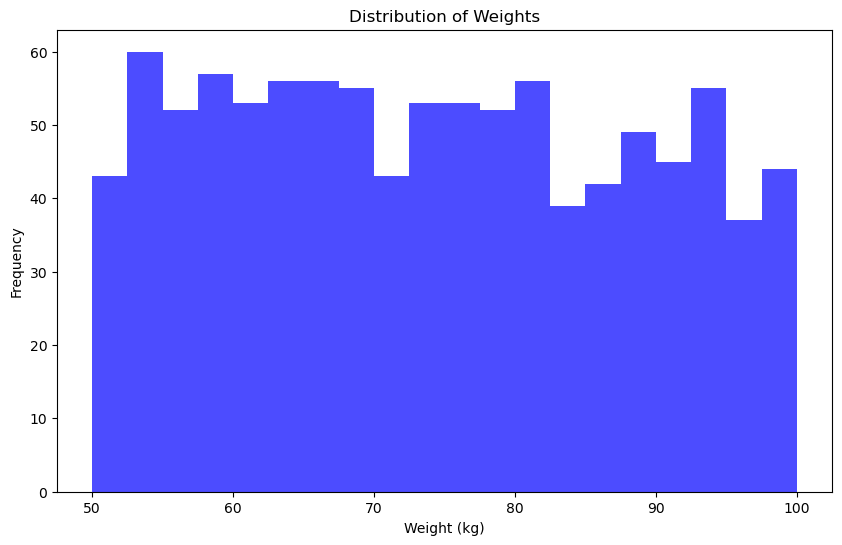

In [27]:
# Plotting the distribution of weights
plt.figure(figsize=(10, 6))
plt.hist(data['Weight_kg'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

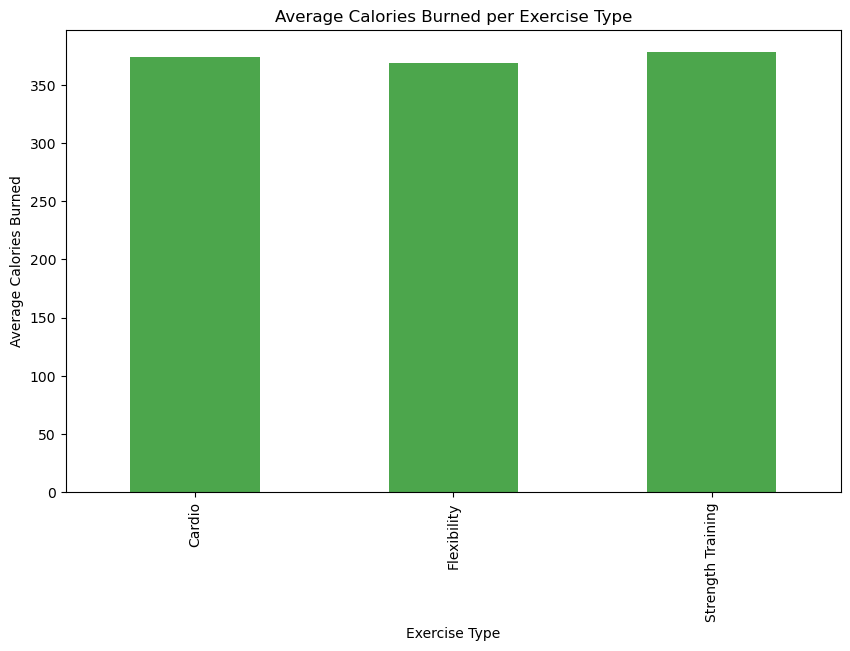

In [29]:
# Plotting average calories burned per exercise type
plt.figure(figsize=(10, 6))
avg_calories = data.groupby('Exercise_Type')['Calories_Burned'].mean()
avg_calories.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Calories Burned per Exercise Type')
plt.xlabel('Exercise Type')
plt.ylabel('Average Calories Burned')
plt.show()

In [30]:
##Engineering features

In [31]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Exercise', 'Exercise_Type'], drop_first=True)

In [34]:
# Feature selection
features = ['Weight_kg', 'Duration_min', 'Days_Attended', 'Calories_Intake_kcal', 'Consistency_Percentage', 'Stress_Level', 'Month']
features.extend([col for col in data.columns if 'Exercise' in col or 'Exercise_Type' in col])
target = 'Calories_Burned'

# Extracting month from the date
data['Month'] = data['Date'].dt.month


In [35]:
X = data[features]
y = data[target]

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8516.355900951747
R^2 Score: 0.4868019981169053


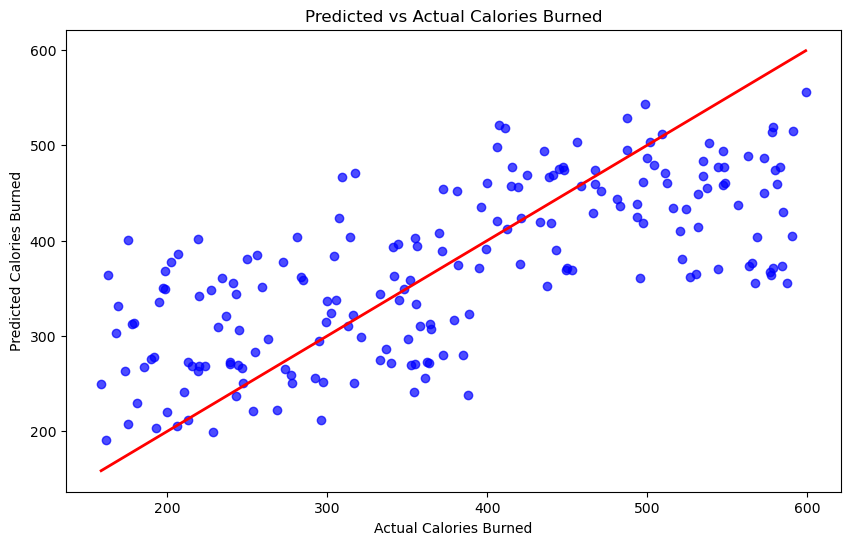

In [38]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Calories Burned')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.show()

In [39]:
##Now we improve our model

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)


In [42]:
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R^2 Score: {rf_r2}')

Random Forest Mean Squared Error: 8774.021084092605
Random Forest R^2 Score: 0.4712750217104881


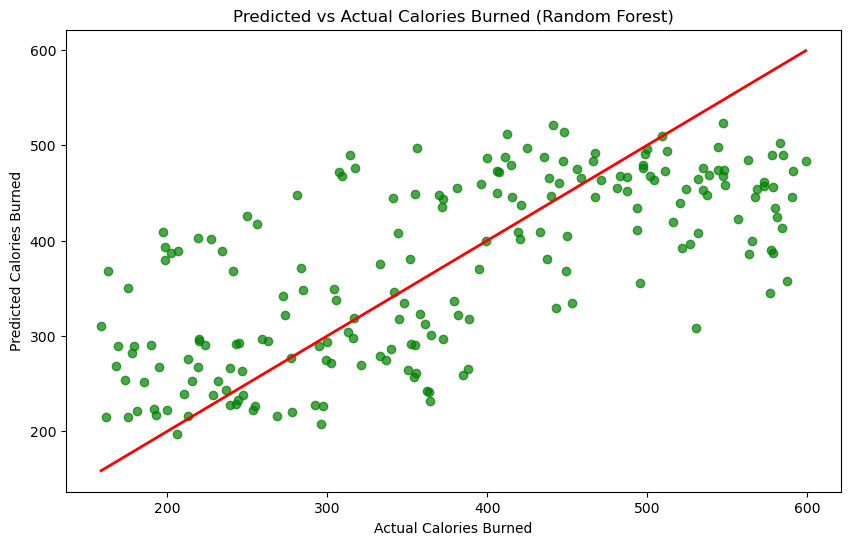

In [43]:
# Plotting the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Calories Burned (Random Forest)')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.show()

In [44]:
##Our model did not improve so we need to take note of this and use it to further improve our machine learning model

In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [46]:
## We now use GridSearchCV to find the best hyperparameters for the Random Forest model.

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Define a reduced parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [54]:
# Initialize the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [63]:
# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}


In [56]:
# Evaluate the model
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print(f'Optimized Random Forest Mean Squared Error: {best_rf_mse}')
print(f'Optimized Random Forest R^2 Score: {best_rf_r2}')

Optimized Random Forest Mean Squared Error: 8650.52970762491
Optimized Random Forest R^2 Score: 0.47871664678934733


In [64]:
# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

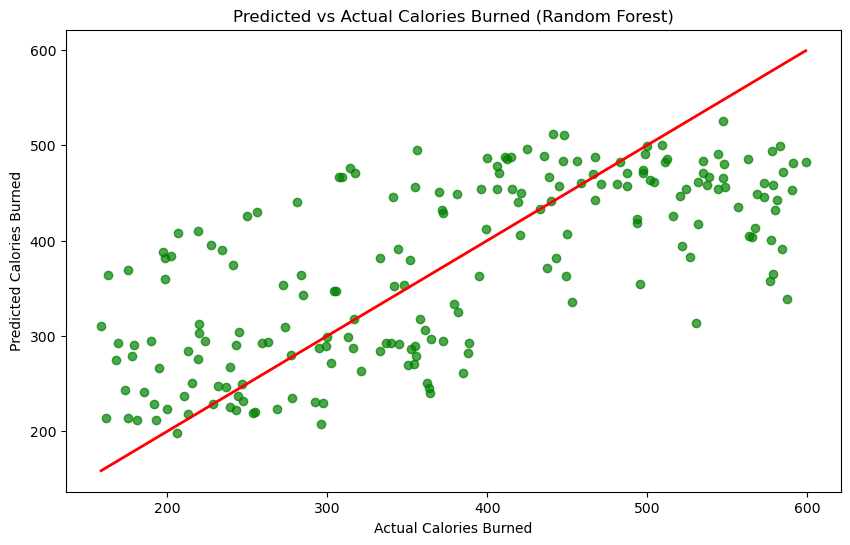

In [57]:
# Plotting the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Calories Burned (Random Forest)')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.show()

In [65]:
# Make predictions
best_rf_y_pred = best_rf_model.predict(X_test_scaled)

In [66]:
# Evaluate the model
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

In [67]:
print(f'Optimized Random Forest Mean Squared Error: {best_rf_mse}')
print(f'Optimized Random Forest R^2 Score: {best_rf_r2}')

Optimized Random Forest Mean Squared Error: 8647.467225302353
Optimized Random Forest R^2 Score: 0.47890119283545174


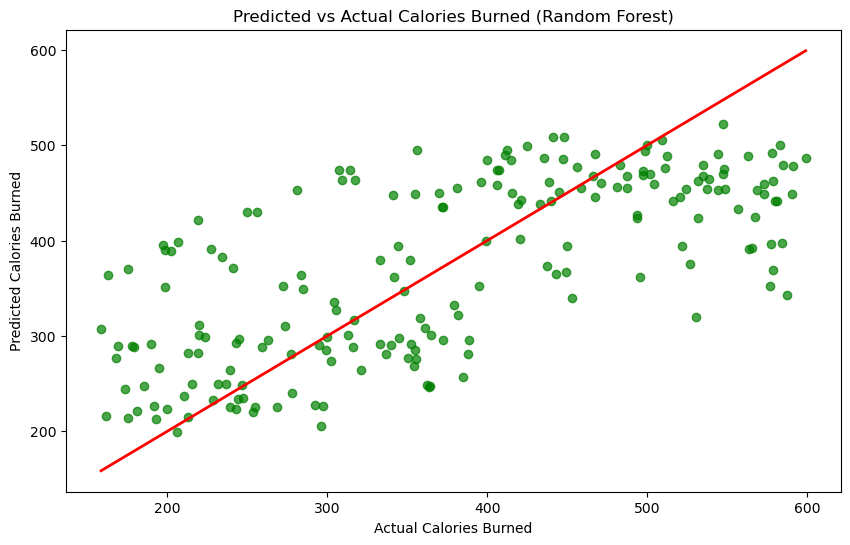

In [68]:

# Plotting the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Calories Burned (Random Forest)')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.show()

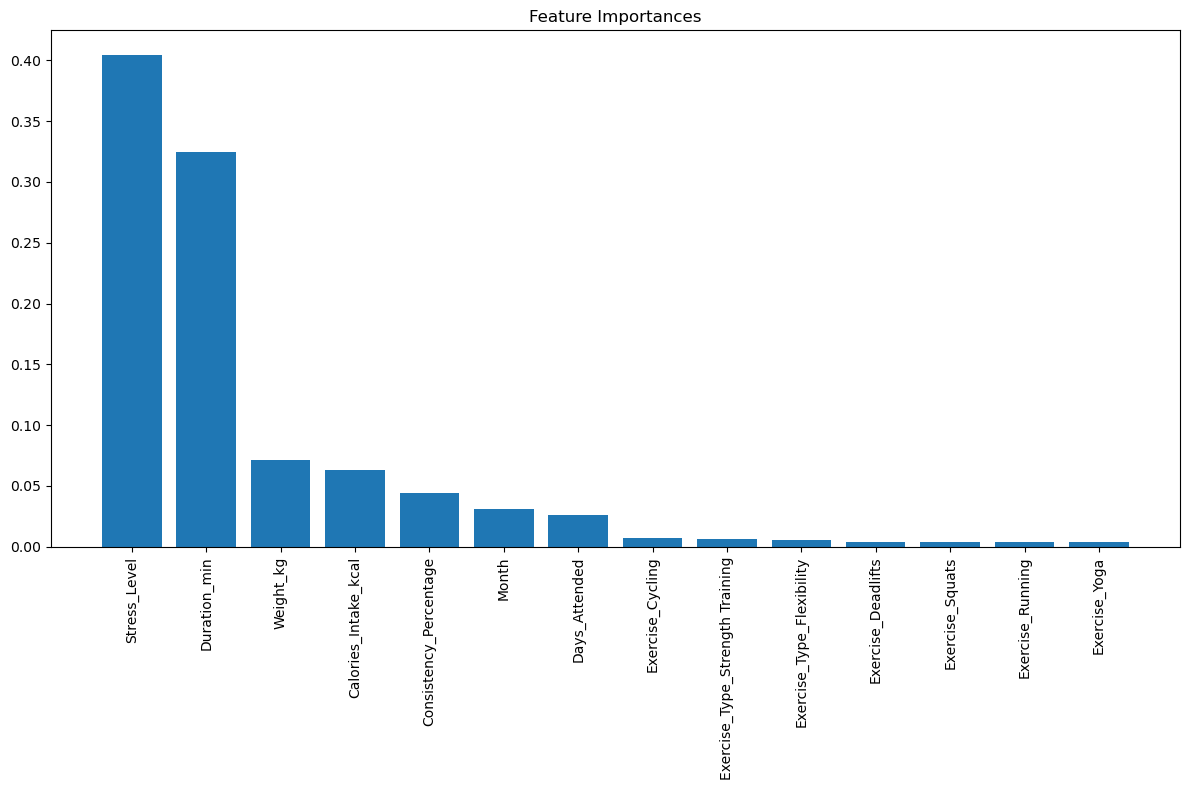

In [69]:
# Feature importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


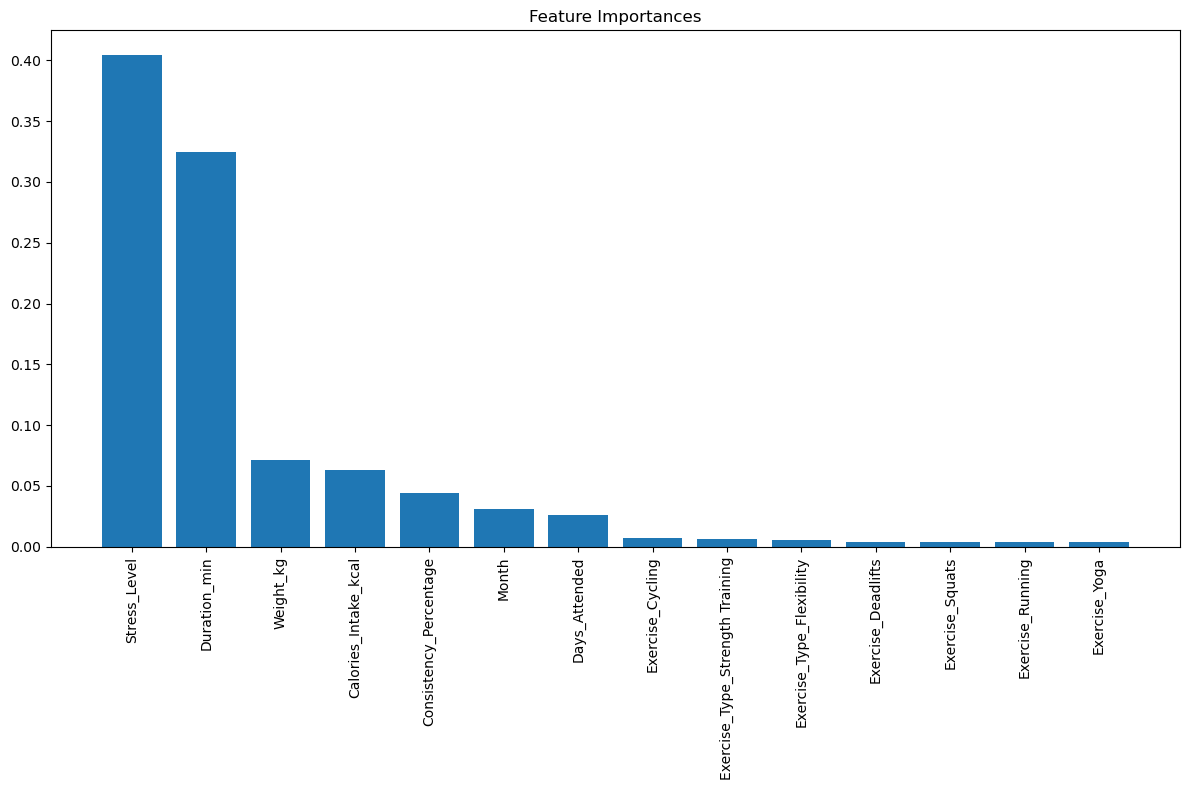

In [72]:
# Make predictions on the entire dataset
all_predictions = best_rf_model.predict(X_scaled)

# Add predictions to the original data
data['Predicted_Calories_Burned'] = all_predictions

# Analyze the predictions
avg_predicted_calories = data.groupby('Exercise_Type')['Predicted_Calories_Burned'].mean()
print(avg_predicted_calories)

KeyError: 'Exercise_Type'

In [73]:
print(data.columns)

Index(['Username', 'Date', 'Weight_kg', 'Duration_min', 'Calories_Burned',
       'Days_Attended', 'Calories_Intake_kcal', 'Consistency_Percentage',
       'Stress_Level', 'Exercise_Cycling', 'Exercise_Deadlifts',
       'Exercise_Running', 'Exercise_Squats', 'Exercise_Yoga',
       'Exercise_Type_Flexibility', 'Exercise_Type_Strength Training', 'Month',
       'Predicted_Calories_Burned'],
      dtype='object')


In [74]:
# Group by Exercise Types (sum of one-hot encoded columns for a category)
exercise_columns = ['Exercise_Cycling', 'Exercise_Deadlifts', 'Exercise_Running', 'Exercise_Squats', 'Exercise_Yoga']
exercise_type_columns = ['Exercise_Type_Flexibility', 'Exercise_Type_Strength Training']

In [75]:
# Average predicted calories burned per exercise
avg_predicted_calories_exercise = data[exercise_columns + ['Predicted_Calories_Burned']].groupby(exercise_columns).mean()

In [76]:
# Print the average predicted calories burned per exercise
print(avg_predicted_calories_exercise)

                                                                                    Predicted_Calories_Burned
Exercise_Cycling Exercise_Deadlifts Exercise_Running Exercise_Squats Exercise_Yoga                           
False            False              False            False           False                         360.061300
                                                                     True                          387.474428
                                                     True            False                         371.945597
                                    True             False           False                         375.491972
                 True               False            False           False                         371.215925
True             False              False            False           False                         371.516344


<Figure size 1000x600 with 0 Axes>

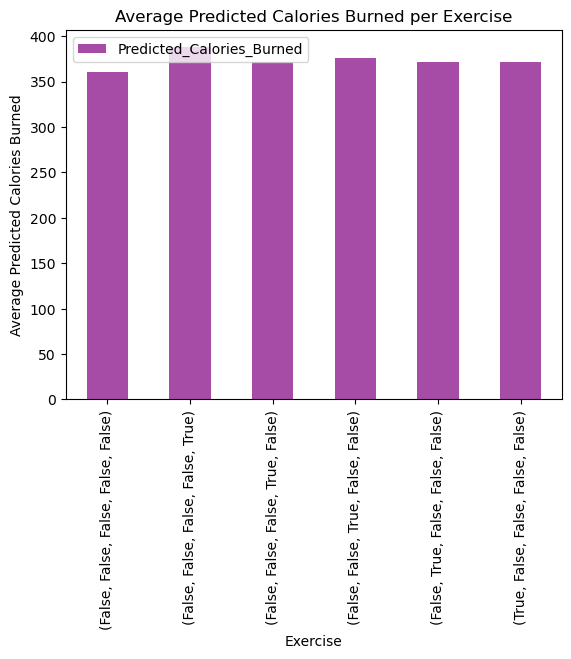

In [79]:
# Plot average predicted calories burned per exercise
plt.figure(figsize=(10, 6))
avg_predicted_calories_exercise.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Predicted Calories Burned per Exercise')
plt.xlabel('Exercise')
plt.ylabel('Average Predicted Calories Burned')
plt.legend(loc='upper left')
plt.show()

In [78]:
# Ensure the correct column name
data['Predicted_Calories_Burned'] = all_predictions

# Analyze the predictions
avg_predicted_calories = data.groupby('Exercise_Type')['Predicted_Calories_Burned'].mean()
print(avg_predicted_calories)

KeyError: 'Exercise_Type'

                                                           Predicted_Calories_Burned
Exercise_Type_Flexibility Exercise_Type_Strength Training                           
False                     False                                           374.261126
                          True                                            378.899654
True                      False                                           365.629062


<Figure size 1000x600 with 0 Axes>

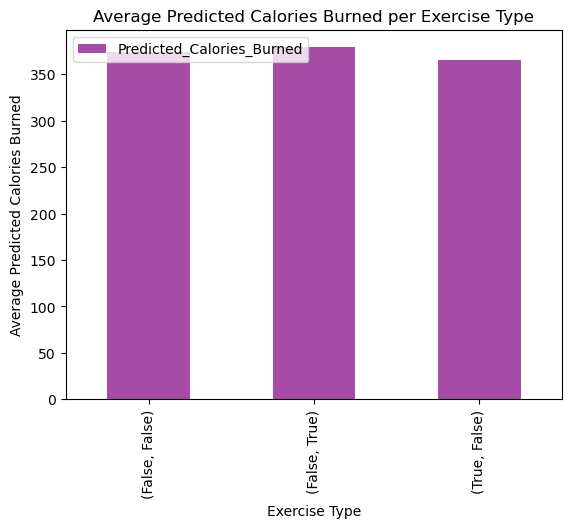

In [80]:
# Average predicted calories burned per exercise type
avg_predicted_calories_exercise_type = data[exercise_type_columns + ['Predicted_Calories_Burned']].groupby(exercise_type_columns).mean()

# Print the average predicted calories burned per exercise type
print(avg_predicted_calories_exercise_type)

# Plot average predicted calories burned per exercise type
plt.figure(figsize=(10, 6))
avg_predicted_calories_exercise_type.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Predicted Calories Burned per Exercise Type')
plt.xlabel('Exercise Type')
plt.ylabel('Average Predicted Calories Burned')
plt.legend(loc='upper left')
plt.show()

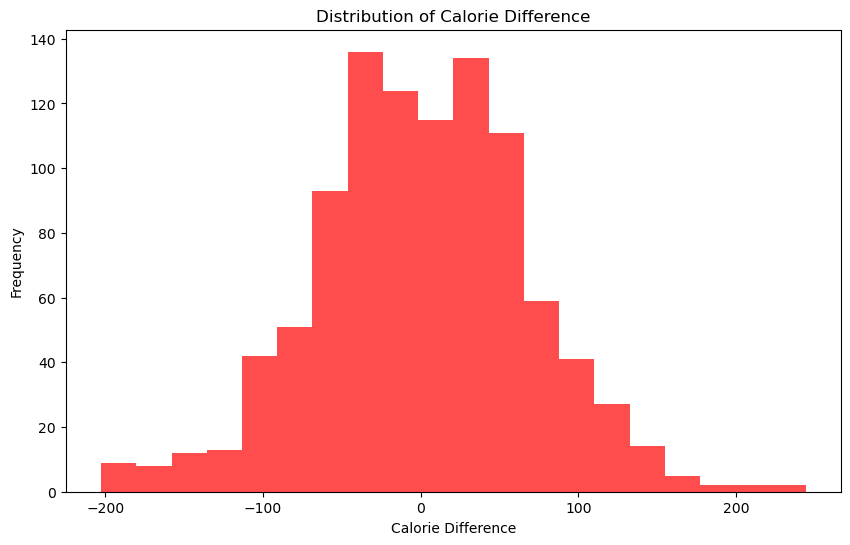

In [81]:
# Additional analysis to find trends and insights
data['Calorie_Difference'] = data['Calories_Burned'] - data['Predicted_Calories_Burned']

# Plotting the calorie difference
plt.figure(figsize=(10, 6))
plt.hist(data['Calorie_Difference'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Calorie Difference')
plt.xlabel('Calorie Difference')
plt.ylabel('Frequency')
plt.show()

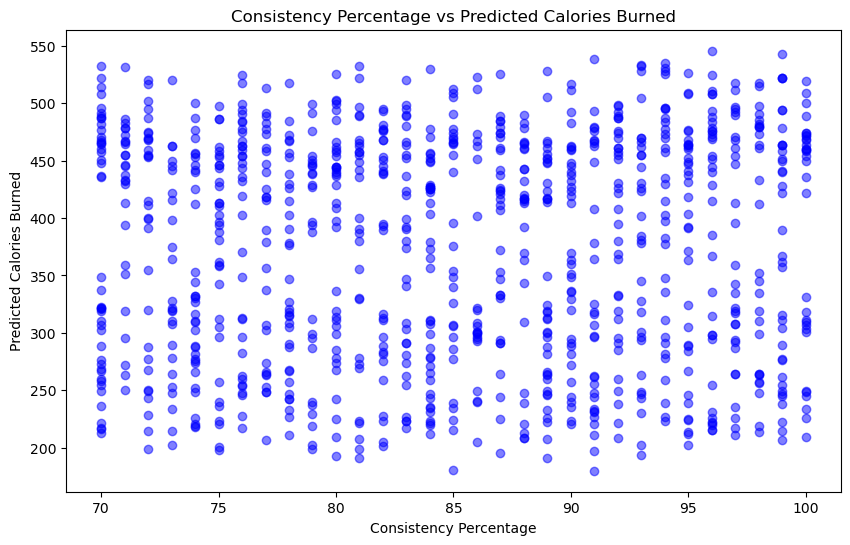

In [82]:
# Analyze the consistency and stress level
plt.figure(figsize=(10, 6))
plt.scatter(data['Consistency_Percentage'], data['Predicted_Calories_Burned'], color='blue', alpha=0.5)
plt.title('Consistency Percentage vs Predicted Calories Burned')
plt.xlabel('Consistency Percentage')
plt.ylabel('Predicted Calories Burned')
plt.show()

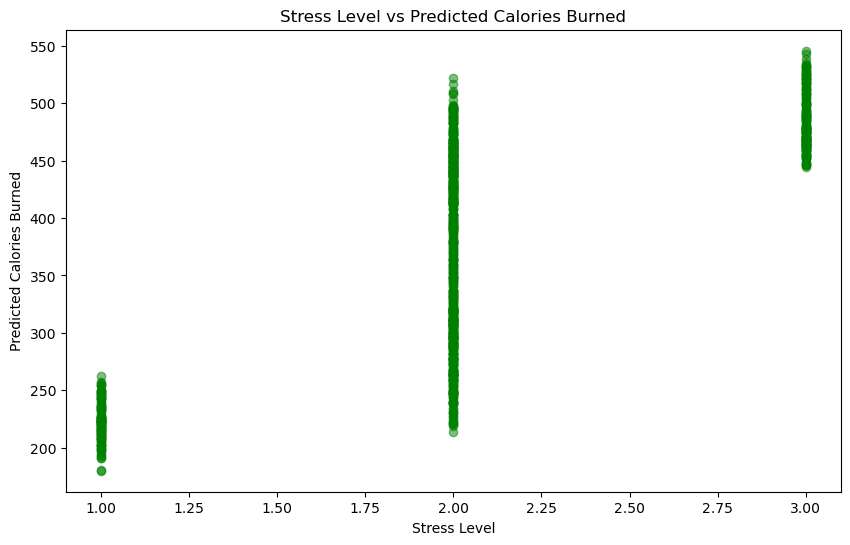

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Stress_Level'], data['Predicted_Calories_Burned'], color='green', alpha=0.5)
plt.title('Stress Level vs Predicted Calories Burned')
plt.xlabel('Stress Level')
plt.ylabel('Predicted Calories Burned')
plt.show()

In [84]:
# Extract features and target variable
features = ['Weight_kg', 'Duration_min', 'Days_Attended', 'Calories_Intake_kcal', 'Consistency_Percentage', 'Stress_Level',
            'Exercise_Cycling', 'Exercise_Deadlifts', 'Exercise_Running', 'Exercise_Squats', 'Exercise_Yoga',
            'Exercise_Type_Flexibility', 'Exercise_Type_Strength Training']
X = data[features]
y = data['Calories_Burned']

In [85]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)


In [87]:
# Define a reduced parameter grid
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [88]:
# Initialize the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=2)

In [89]:
# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
best_rf_y_pred = best_rf_model.predict(X_test_scaled)

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [90]:
# Evaluate the model
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print(f'Optimized Random Forest Mean Squared Error: {best_rf_mse}')
print(f'Optimized Random Forest R^2 Score: {best_rf_r2}')

Optimized Random Forest Mean Squared Error: 8596.615282685614
Optimized Random Forest R^2 Score: 0.4819655452000432


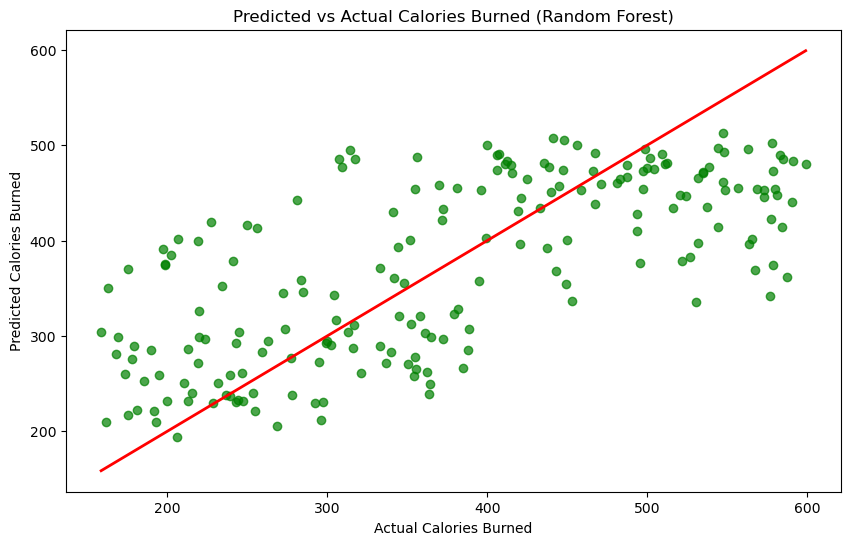

In [91]:
# Plotting the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Calories Burned (Random Forest)')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.show()

In [92]:
# Make predictions on the entire dataset
all_predictions = best_rf_model.predict(X_scaled)

# Ensure the correct column name
data['Predicted_Calories_Burned'] = all_predictions

In [100]:
# Define the exercise columns and exercise type columns
exercise_columns = ['Exercise_Cycling', 'Exercise_Deadlifts', 'Exercise_Running', 'Exercise_Squats', 'Exercise_Yoga']
exercise_type_columns = ['Exercise_Type_Flexibility', 'Exercise_Type_Strength Training']

# Group by exercise columns and compute mean predicted calories burned
avg_predicted_calories_exercise = data.groupby(exercise_columns)['Predicted_Calories_Burned'].mean().reset_index()

# Print the average predicted calories burned per exercise
print(avg_predicted_calories_exercise)


   Exercise_Cycling  Exercise_Deadlifts  Exercise_Running  Exercise_Squats  \
0             False               False             False            False   
1             False               False             False            False   
2             False               False             False             True   
3             False               False              True            False   
4             False                True             False            False   
5              True               False             False            False   

   Exercise_Yoga  Predicted_Calories_Burned  
0          False                 361.648894  
1           True                 388.026474  
2          False                 369.568094  
3          False                 375.243039  
4          False                 373.453028  
5          False                 371.802655  


In [101]:
# Group by exercise type columns and compute mean predicted calories burned
avg_predicted_calories_exercise_type = data.groupby(exercise_type_columns)['Predicted_Calories_Burned'].mean().reset_index()

# Print the average predicted calories burned per exercise type
print(avg_predicted_calories_exercise_type)


   Exercise_Type_Flexibility  Exercise_Type_Strength Training  \
0                      False                            False   
1                      False                             True   
2                       True                            False   

   Predicted_Calories_Burned  
0                 374.580956  
1                 379.406921  
2                 365.967596  


In [99]:
data.head()

,Username,Date,Weight_kg,Duration_min,Calories_Burned,Days_Attended,Calories_Intake_kcal,Consistency_Percentage,Stress_Level,Exercise_Cycling,Exercise_Deadlifts,Exercise_Running,Exercise_Squats,Exercise_Yoga,Exercise_Type_Flexibility,Exercise_Type_Strength Training,Month,Predicted_Calories_Burned,Calorie_Difference
0,DonnaBruce,2023-09-18,94.33,79,400.59,3,2251.40,71,3,False,False,False,True,False,False,True,9,445.161013,-45.180808
1,AliciaJohnson,2024-04-04,93.18,88,230.51,1,2772.93,74,2,True,False,False,False,False,False,False,4,288.707962,-57.236529
2,CristinaSmith,2024-02-29,62.66,22,493.68,4,2859.11,91,2,False,False,True,False,False,False,True,2,460.614671,28.340168
3,EmilyAtkinson,2024-06-23,98.91,67,256.87,3,2569.95,82,2,False,False,True,False,False,False,False,6,286.957691,-26.400170
4,RebeccaKelly,2024-02-13,81.10,84,200.43,6,1749.05,99,2,False,False,False,False,False,False,True,2,253.775815,-61.147403


<Figure size 1000x600 with 0 Axes>

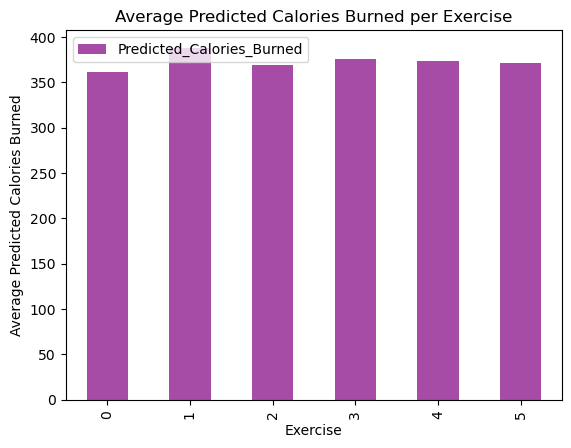

In [102]:
# Plot average predicted calories burned per exercise
plt.figure(figsize=(10, 6))
avg_predicted_calories_exercise.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Predicted Calories Burned per Exercise')
plt.xlabel('Exercise')
plt.ylabel('Average Predicted Calories Burned')
plt.legend(loc='upper left')
plt.show()

In [103]:
# Average predicted calories burned per exercise type
avg_predicted_calories_exercise_type = data[exercise_type_columns + ['Predicted_Calories_Burned']].groupby(exercise_type_columns).mean()


In [97]:
# Average predicted calories burned per exercise type
avg_predicted_calories_exercise_type = data[exercise_type_columns + ['Predicted_Calories_Burned']].groupby(exercise_type_columns).mean()

# Print the average predicted calories burned per exercise type
print(avg_predicted_calories_exercise_type)


                                                           Predicted_Calories_Burned
Exercise_Type_Flexibility Exercise_Type_Strength Training                           
False                     False                                           374.580956
                          True                                            379.406921
True                      False                                           365.967596


<Figure size 1000x600 with 0 Axes>

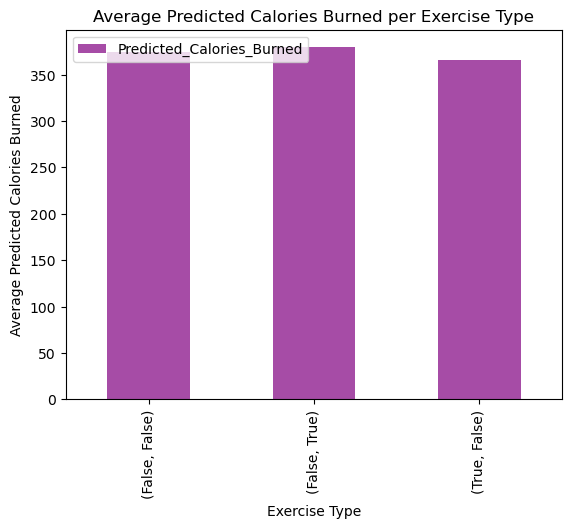

In [104]:
# Plot average predicted calories burned per exercise type
plt.figure(figsize=(10, 6))
avg_predicted_calories_exercise_type.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Predicted Calories Burned per Exercise Type')
plt.xlabel('Exercise Type')
plt.ylabel('Average Predicted Calories Burned')
plt.legend(loc='upper left')
plt.show()


In [105]:
# Additional analysis to find trends and insights
data['Calorie_Difference'] = data['Calories_Burned'] - data['Predicted_Calories_Burned']

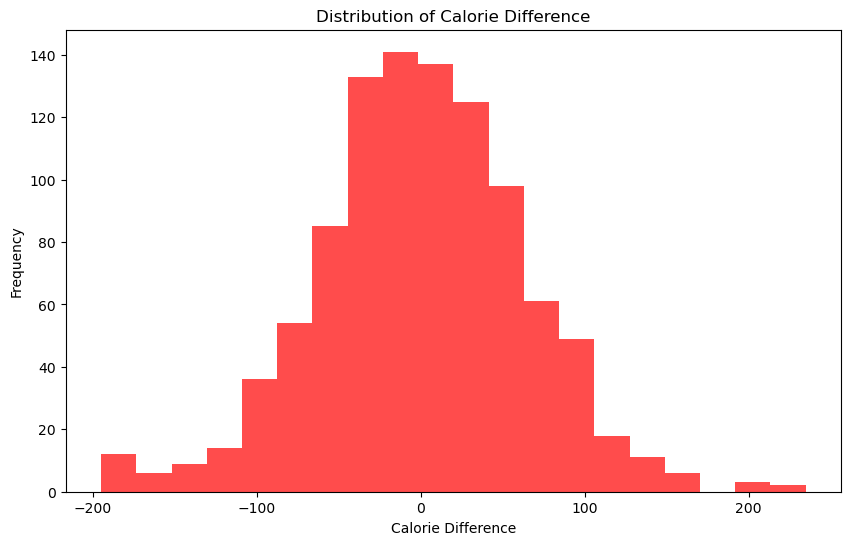

In [106]:
# Plotting the calorie difference
plt.figure(figsize=(10, 6))
plt.hist(data['Calorie_Difference'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Calorie Difference')
plt.xlabel('Calorie Difference')
plt.ylabel('Frequency')
plt.show()

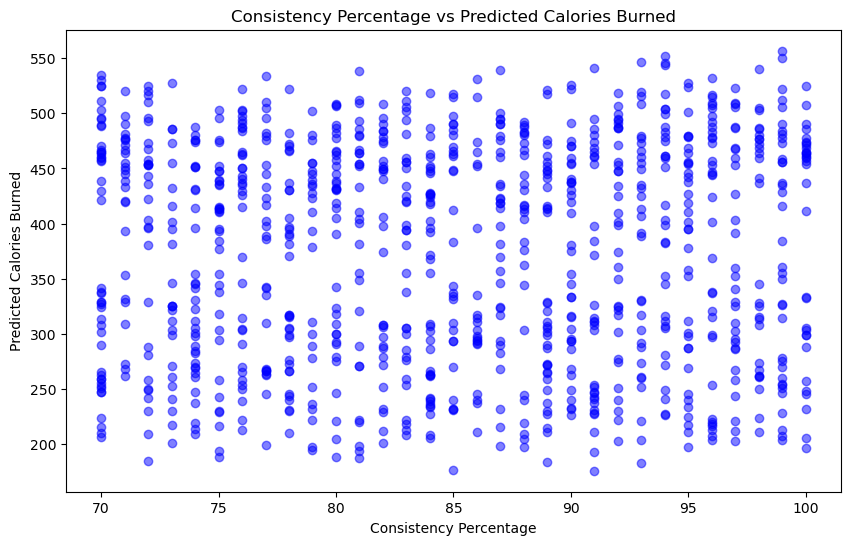

In [107]:
# Analyze the consistency and stress level
plt.figure(figsize=(10, 6))
plt.scatter(data['Consistency_Percentage'], data['Predicted_Calories_Burned'], color='blue', alpha=0.5)
plt.title('Consistency Percentage vs Predicted Calories Burned')
plt.xlabel('Consistency Percentage')
plt.ylabel('Predicted Calories Burned')
plt.show()


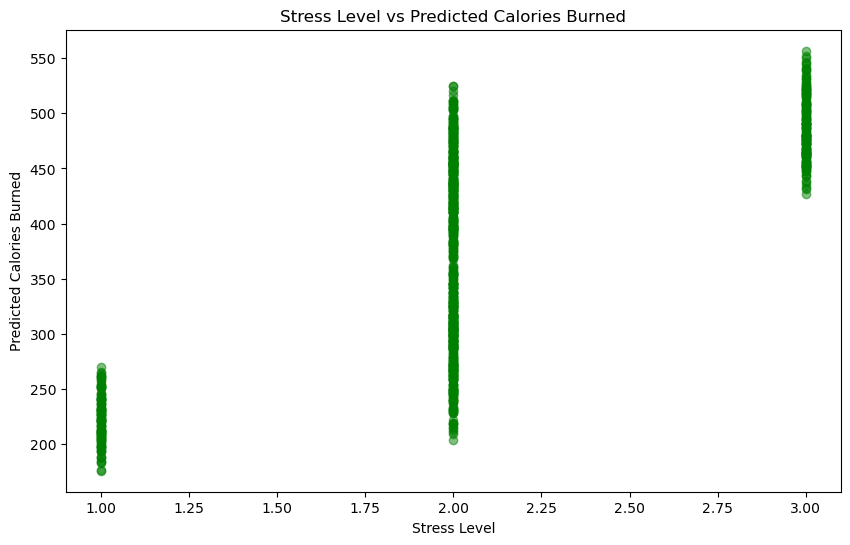

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Stress_Level'], data['Predicted_Calories_Burned'], color='green', alpha=0.5)
plt.title('Stress Level vs Predicted Calories Burned')
plt.xlabel('Stress Level')
plt.ylabel('Predicted Calories Burned')
plt.show()